In [15]:
from collections import Counter
import re

# Simple word frequency from titles
words = " ".join(df_clean['title']).lower()
words = re.findall(r'\b[a-z]{4,}\b', words)  # keep words with 4+ letters
counter = Counter(words)

print("Most common words in titles:")
print(counter.most_common(20))


Most common words in titles:
[('coronavirus', 695), ('novel', 429), ('covid', 306), ('ncov', 193), ('china', 175), ('pneumonia', 175), ('outbreak', 158), ('with', 137), ('disease', 132), ('from', 130), ('sars', 129), ('infection', 109), ('patients', 97), ('epidemic', 93), ('clinical', 88), ('wuhan', 78), ('health', 75), ('respiratory', 67), ('during', 64), ('cases', 62)]


In [14]:
# Check if 'publisher' column exists
if 'publisher' in df_clean.columns:
    top_publishers = df_clean['publisher'].value_counts().head(10)
    print(top_publishers)

    top_publishers.plot(kind='barh', figsize=(8,5))
    plt.title("Top 10 Publishers")
    plt.xlabel("Number of Publications")
    plt.show()


year
2006.0       1
2008.0       1
2012.0       2
2013.0       3
2014.0       7
2015.0       7
2016.0       3
2018.0       7
2019.0       9
2020.0    1148
Name: count, dtype: int64


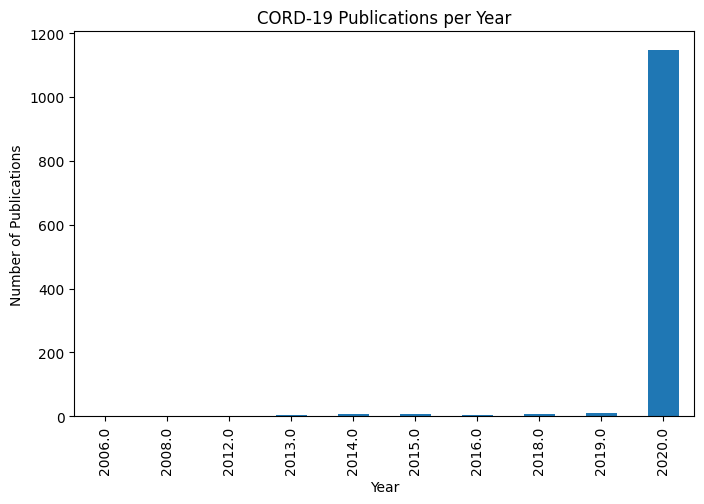

In [13]:
# Count publications per year
pubs_per_year = df_clean['year'].value_counts().sort_index()

# Display numbers
print(pubs_per_year)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
pubs_per_year.plot(kind='bar')
plt.title("CORD-19 Publications per Year")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.show()


In [12]:
# Cell 10: most common words in titles (basic cleaning)
all_titles = " ".join(df_clean['title'].dropna().astype(str)).lower()
# remove punctuation and short words
words = re.findall(r'\b[a-z]{3,}\b', all_titles)  # words of length >= 3
common = Counter(words).most_common(30)
common


[('coronavirus', 695),
 ('the', 643),
 ('and', 440),
 ('novel', 429),
 ('covid', 306),
 ('for', 263),
 ('ncov', 193),
 ('china', 175),
 ('pneumonia', 175),
 ('outbreak', 158),
 ('with', 137),
 ('disease', 132),
 ('from', 130),
 ('sars', 129),
 ('cov', 113),
 ('infection', 109),
 ('patients', 97),
 ('epidemic', 93),
 ('clinical', 88),
 ('wuhan', 78),
 ('health', 75),
 ('respiratory', 67),
 ('during', 64),
 ('cases', 62),
 ('treatment', 60),
 ('analysis', 58),
 ('new', 56),
 ('virus', 49),
 ('potential', 48),
 ('prevention', 47)]

journal
Nature                                    42
BMJ                                       37
The Lancet                                34
Science                                   24
Zhonghua Jie He He Hu Xi Za Zhi           23
Journal of Medical Virology               20
Radiology                                 19
JAMA                                      16
Journal of Clinical Medicine              15
Journal of Hospital Infection             15
Eurosurveillance                          14
Travel Medicine and Infectious Disease    14
BMJ (Clinical research ed.)               13
Journal of Infection                      13
New Scientist                             13
Name: count, dtype: int64


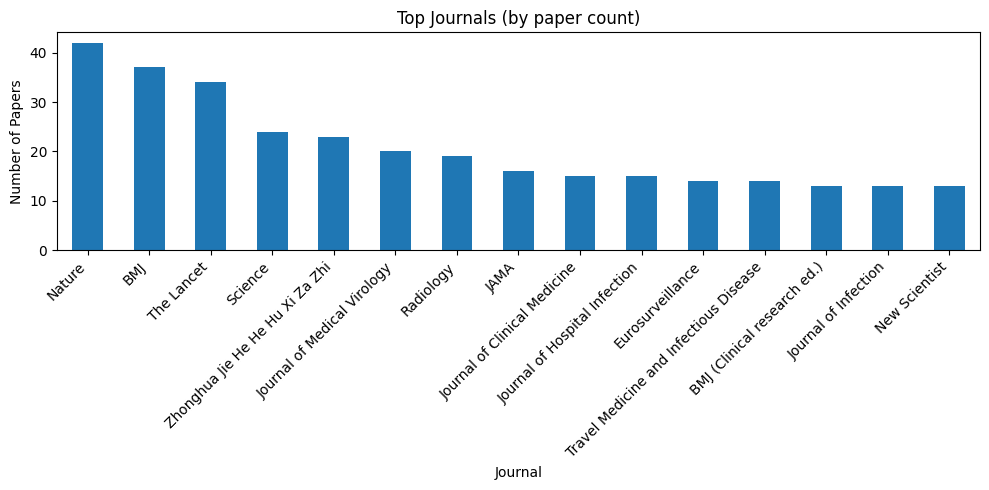

In [11]:
# Cell 9: top journals
if journal_col:
    top_journals = df_clean[journal_col].dropna().value_counts().head(15)
    print(top_journals)
    plt.figure(figsize=(10,5))
    top_journals.plot(kind='bar')
    plt.title("Top Journals (by paper count)")
    plt.xlabel("Journal")
    plt.ylabel("Number of Papers")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No journal column detected.")


year
2006.0       1
2008.0       1
2012.0       2
2013.0       3
2014.0       7
2015.0       7
2016.0       3
2018.0       7
2019.0       9
2020.0    1148
Name: count, dtype: int64


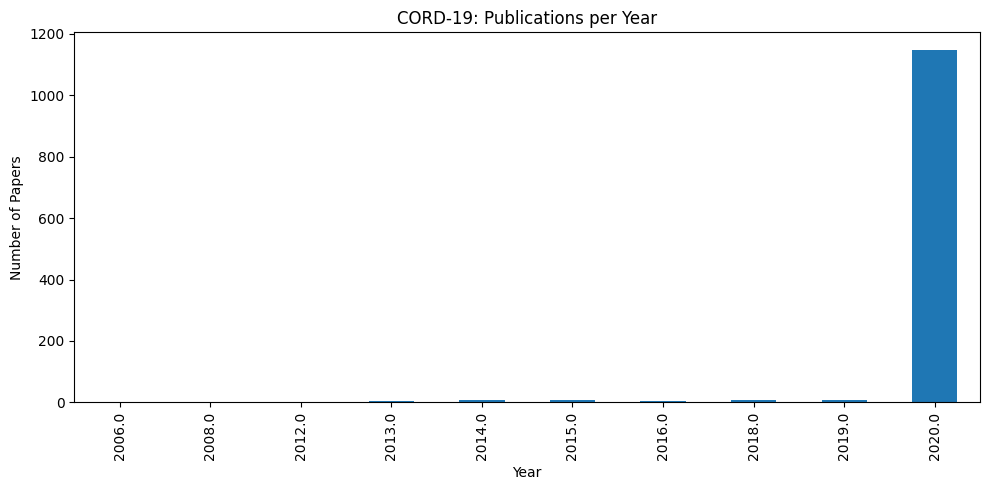

In [10]:
# Cell 8: pubs per year
pubs_per_year = df_clean['year'].value_counts().sort_index()
print(pubs_per_year)

# plot
plt.figure(figsize=(10,5))
pubs_per_year.plot(kind='bar')
plt.title("CORD-19: Publications per Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.tight_layout()
plt.show()


In [9]:
# Cell 7: clean core required fields
import os

# Drop rows without a title or a publish_time (these rows can't be used for time-based publication analysis)
required_cols = []
if title_col:
    required_cols.append(title_col)
required_cols.append('publish_time')

df_clean = df.dropna(subset=required_cols).copy()
print("After dropping missing title/date, shape:", df_clean.shape)

# Add an abstract word count column (useful for exploration)
if abstract_col:
    df_clean['abstract'] = df_clean[abstract_col].fillna("").astype(str)
else:
    df_clean['abstract'] = ""

df_clean['abstract_word_count'] = df_clean['abstract'].apply(lambda x: len(str(x).split()))

# Ensure title is string
df_clean['title'] = df_clean[title_col].astype(str)

# --- NEW PART: Ensure output folder exists ---
os.makedirs("cord19_data", exist_ok=True)

# Save cleaned CSV for reuse
CLEANED_PATH = "cord19_data/cleaned_metadata.csv"
df_clean.to_csv(CLEANED_PATH, index=False)
print("Cleaned dataset saved to:", CLEANED_PATH)


After dropping missing title/date, shape: (1188, 15)
Cleaned dataset saved to: cord19_data/cleaned_metadata.csv


In [7]:
# Cell 6: canonicalize columns and convert date
# Choose the column names found above; adjust if your dataset shows different candidate lists.
date_col = None
for c in date_candidates:
    if c in df.columns:
        date_col = c
        break

title_col = title_candidates[0] if title_candidates else None
journal_col = journal_candidates[0] if journal_candidates else None
abstract_col = abstract_candidates[0] if abstract_candidates else None
authors_col = authors_candidates[0] if authors_candidates else None

print("Using:", dict(date_col=date_col, title_col=title_col, journal_col=journal_col, abstract_col=abstract_col, authors_col=authors_col))

# Convert the date column (if found) into a canonical 'publish_time' / 'year'
if date_col:
    df['publish_time'] = pd.to_datetime(df[date_col], errors='coerce')
    df['year'] = df['publish_time'].dt.year
else:
    print("No date column found automatically — you may need to inspect df.columns and set date_col manually.")


Using: {'date_col': 'publish_time', 'title_col': 'title', 'journal_col': 'journal', 'abstract_col': 'abstract', 'authors_col': 'authors'}


In [6]:
# Cell 5: heuristically find useful column names
col_lower = {c:c.lower() for c in df.columns}
# find best candidate for date
date_candidates = [c for c in df.columns if 'publish' in c.lower() or 'date' in c.lower()]
title_candidates = [c for c in df.columns if 'title' in c.lower() or 'name' in c.lower()]
journal_candidates = [c for c in df.columns if 'journal' in c.lower()]
abstract_candidates = [c for c in df.columns if 'abstract' in c.lower() or 'summary' in c.lower() or 'description' in c.lower()]
authors_candidates = [c for c in df.columns if 'author' in c.lower() or 'creator' in c.lower()]

print("Date candidates:", date_candidates)
print("Title candidates:", title_candidates)
print("Journal candidates:", journal_candidates)
print("Abstract candidates:", abstract_candidates)
print("Authors candidates:", authors_candidates)


Date candidates: ['publish_time']
Title candidates: ['title']
Journal candidates: ['journal']
Abstract candidates: ['abstract']
Authors candidates: ['authors']


In [5]:
# Cell 4: columns and missing value overview
cols = df.columns.tolist()
print("Columns:", cols)
print("\nMissing values (top 20):")
print(df.isnull().sum().sort_values(ascending=False).head(20))


Columns: ['sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time', 'authors', 'journal', 'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text']

Missing values (top 20):
Microsoft Academic Paper ID    28366
WHO #Covidence                 28264
pubmed_id                      12770
sha                            12080
has_full_text                  12080
license                        11808
journal                        11709
publish_time                   10896
doi                             3143
abstract                        2591
pmcid                           2163
authors                          597
title                              9
source_x                           0
dtype: int64


In [4]:
# Cell 3: load the full file (can take a bit of time)
df = pd.read_csv(DATA_PATH, low_memory=False, on_bad_lines='skip')  # low_memory=False helps dtype inference
print("Full load done. Shape:", df.shape)


Full load done. Shape: (29500, 14)


In [3]:
# Cell 2: load a small sample first (safer if file is large)
sample = pd.read_csv(DATA_PATH, nrows=100, low_memory=False, on_bad_lines='skip')
print("Sample loaded. Shape:", sample.shape)
print("Columns (sample):", sample.columns.tolist())
sample.head()


Sample loaded. Shape: (100, 14)
Columns (sample): ['sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id', 'license', 'abstract', 'publish_time', 'authors', 'journal', 'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_full_text']


,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455.0,cc-by-nc,NaN,2020.0,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2.002765e+09,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020.0,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3.003431e+09,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020.0,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3.006065e+09,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211.0,cc-by,"In December 2019, cases of unidentified pneumo...",2020.0,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,1.776631e+08,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453.0,cc-by-nc,NaN,2020.0,"Zhang, Wei",Intensive Care Med,3.006643e+09,#3242,False


In [2]:
# Cell 1: imports and file path
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import os

# Set path to the extracted CSV (change if your file is elsewhere)
DATA_PATH = "C:\\Users\\ROBERT\\Desktop\\final-final-project-python\\all_sources_metadata_2020-03-13.csv"

# Optional: reduce warnings in notebook output
import warnings
warnings.filterwarnings("ignore")
